In [1]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import IPython.display as display
import os

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#gpu = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpu[0], True)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



Num GPUs Available:  0


In [30]:
input_img = Input(shape=(256,256,3), name='Input')

x = Conv2D(100, (5, 5), activation='relu', padding='same', name='conv')(input_img)
x = MaxPooling2D((2,2), padding='same', name='pool_1')(x)
x = Conv2D(5, (5, 5), activation='relu', padding='same', name='conv_2')(x)
x = MaxPooling2D((2,2), padding='same', name='pool_2')(x)

encoded = x

x = UpSampling2D((2,2), name='unpool_1')(encoded)
x = Conv2D(5, (5, 5), activation='relu', padding='same', name='unconv')(x)
x = UpSampling2D((2,2), name='unpool_2')(x)
#x = Conv2D(10, (5, 5), activation='relu', padding='same')(x)
decoded = Conv2D(3, (5,5), activation='relu', padding='same', name='reconstruct')(x)


autoencoder = Model(input_img, decoded)
#tf.keras.utils.plot_model(autoencoder, to_file='model.png', show_shapes=True, expand_nested=True)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#### Read images

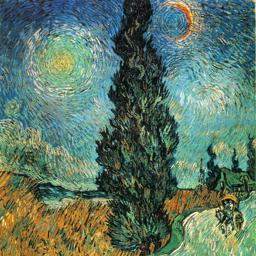

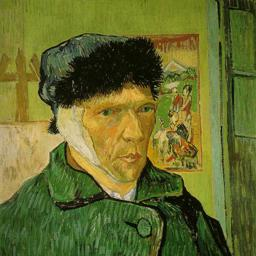

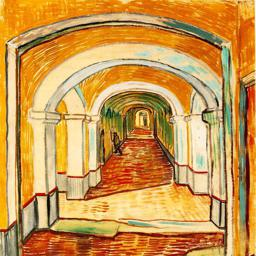

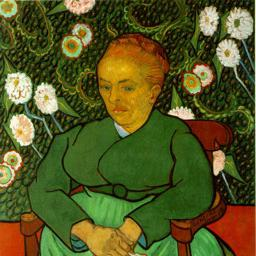

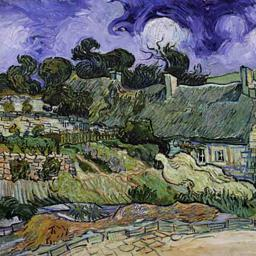

In [31]:

def read_images(image_dir):
    data = []
    for file in os.listdir(image_dir):
        im = Image.open(image_dir + file)
        data.append(np.array(im.getdata()).reshape((256,256,3))/255.0)
        display.display(im)
    data = np.array(data)
    return data

image_dir = '../DeepPainter/ImagesNorm/'

data = read_images(image_dir)

In [32]:
autoencoder.fit(
    data, data,
    epochs=100,
    batch_size=1,
    shuffle=True,
)

Epoch 1/100
5/5 [==============================] - 2s 317ms/sample - loss: 2.5626
Epoch 2/100
5/5 [==============================] - 1s 264ms/sample - loss: 2.0662
Epoch 3/100
5/5 [==============================] - 1s 265ms/sample - loss: 2.0032
Epoch 4/100
5/5 [==============================] - 1s 265ms/sample - loss: 1.9315
Epoch 5/100
5/5 [==============================] - 1s 266ms/sample - loss: 1.8951
Epoch 6/100
5/5 [==============================] - 1s 293ms/sample - loss: 1.8671
Epoch 7/100
5/5 [==============================] - 2s 329ms/sample - loss: 1.8335
Epoch 8/100
5/5 [==============================] - 1s 275ms/sample - loss: 0.8699
Epoch 9/100
5/5 [==============================] - 1s 265ms/sample - loss: 0.6796
Epoch 10/100
5/5 [==============================] - 1s 267ms/sample - loss: 0.7161
Epoch 11/100
5/5 [==============================] - 1s 269ms/sample - loss: 0.6750
Epoch 12/100
5/5 [==============================] - 1s 271ms/sample - loss: 0.6447
Epoch 13/100


In [33]:
images_out = autoencoder.predict(data)
print(images_out[0])

[[[0.11523846 0.13551347 0.08305647]
  [0.1539821  0.16243088 0.13238291]
  [0.1732376  0.14010876 0.11728366]
  ...
  [0.18146113 0.16474389 0.14002353]
  [0.12950942 0.07326862 0.10709608]
  [0.08503085 0.08993249 0.05420783]]

 [[0.1197287  0.16657731 0.06985785]
  [0.17173266 0.19131397 0.11640442]
  [0.17217432 0.1723012  0.1368044 ]
  ...
  [0.16728306 0.21591936 0.15799734]
  [0.11445925 0.07618622 0.10533351]
  [0.03679956 0.1511526  0.04616944]]

 [[0.14655128 0.17184848 0.11728686]
  [0.18943754 0.22066686 0.19756266]
  [0.232118   0.18482119 0.22230975]
  ...
  [0.257971   0.25783902 0.26536742]
  [0.18988656 0.15719777 0.16096102]
  [0.13262649 0.23900917 0.05766652]]

 ...

 [[0.15052302 0.14151838 0.18465485]
  [0.28937748 0.2581623  0.1883407 ]
  [0.3756059  0.3548531  0.2463166 ]
  ...
  [0.54737127 0.52777624 0.39458996]
  [0.36518002 0.45980358 0.22076008]
  [0.2573113  0.54898983 0.06862296]]

 [[0.07447398 0.08310807 0.14237593]
  [0.21200913 0.20582393 0.17634545]


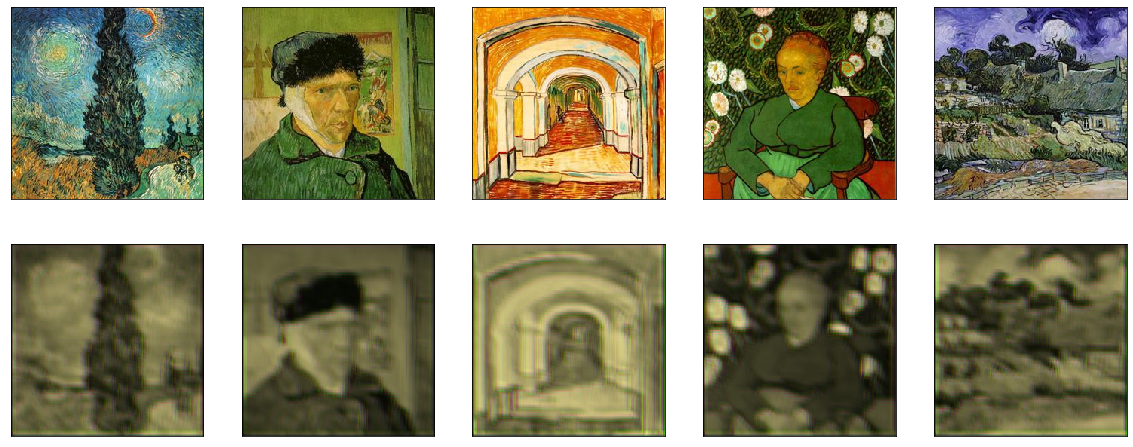

In [36]:
def plot_images(img_in, img_out, filename):
    n = len(img_in)
    plt.figure(figsize=(n*4, 8))

    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(img_in[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
        ax = plt.subplot(2, n, i+n+1)
        plt.imshow(img_out[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.savefig(filename)
    
plot_images(data, images_ou, 'data.png')

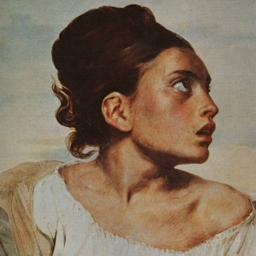

In [27]:
test = read_images('TestNorm/')


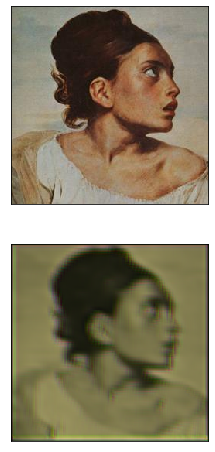

In [37]:
images_out = autoencoder.predict([test])
plot_images(test, images_out, 'different_genre.jpg')